# DATA 512 - Wildfire Analysis - Final Project 

## National Forest Tourism Data Analysis with Wildfire Smoke Estimates

### Baisakhi Sarkar, University of Washington, MSDS 2023-2025


More and more frequently summers in the western US have been characterized by wildfires with smoke billowing across multiple western states. There are many proposed causes for this: climate change, US Forestry policy, growing awareness, just to name a few. Regardless of the cause, the impact of wildland fires is widespread as wildfire smoke reduces the air quality of many cities. There is a growing body of work pointing to the negative impacts of smoke on health, tourism, property, and other aspects of society.

The course project will require that us to analyze wildfire impacts on a specific city in the US. The end goal is to be able to inform policy makers, city managers, city councils, or other civic institutions, to make an informed plan for how they could or whether they should make plans to mitigate future impacts from wildfires.

The common analysis research question is based on one specific dataset. We get the [Combined wildland fire datasets for the United States](https://www.sciencebase.gov/catalog/item/61aa537dd34eb622f699df81) and certain territories, 1800s-Present (combined wildland fire polygons) dataset. This dataset was collected and aggregated by the US Geological Survey. The dataset is relatively well documented. The dataset provides fire polygons in ArcGIS and GeoJSON formats. 

Wildland fires within 650 miles of Palmdale, California are analyzed for the last 60 years (1964-2021). A smoke estimate is then created to estimate the wildfire smoke impact which is later modeled to make predictions for the next 25 years (until 2050).

Wildland fires within 650 miles of Palmdale, California are analyzed for the last 60 years (1964-2020). This section of the notebook uses the Final_Wildfire_Data_Cleaned.csv generated from the Wildfire_Analysis_Data_Cleaning.ipynb notebook , and the Yearly_AQI_Data.csv generated from the Wildfire_Analysis_Data_Acquisition.ipynb notebook Using these datasets, a smoke estimate is created which is then evaluated using the AQI levels. The smoke estimate is then modeled to generate predictions from 2025 to 2050. Visualizations are also created at the end to generate further insights.

#### This notebook explores the relationship between wildfire smoke estimates and tourism trends in California's national parks. Using historical wildfire and visitor data, we aim to:

1. Analyze the historical visitor trends for national parks.
2. Identify the correlation between wildfire smoke estimates and visitor counts.
3. Build predictive models for future visitor counts under different smoke scenarios.

Datasets:
- **[Wildfire Data](https://www.sciencebase.gov/catalog/item/61aa537dd34eb622f699df81)**: US Geological Survey Combined Wildland Fire Datasets (1964–2020).
- **[Tourism Data](https://irma.nps.gov/Stats/Reports/Park/YOSE)**: (Please select "Recreation Visits By Month (1979 - Current Calendar Year" option from the list) National Park Service Visitor Use Statistics (10 National Parks with 650 miles of Palmdale, California are considered). This [link](https://irma.nps.gov/Stats/SSRSReports/Park%20Specific%20Reports/Recreation%20Visitors%20By%20Month%20(1979%20-%20Last%20Calendar%20Year)?Park=REDW) gives the csv report for each park visitor statistics, the park name and years needs to be selected accordingly.

Objective:
- Inform policymakers and stakeholders about the impact of wildfires on tourism and suggest mitigation strategies.


### Step 1: Preliminaries



In [1]:
# These are standard python modules
import pandas as pd
import warnings

# The modules below are not standard Python modules
# You will need to install these with pip/pip3 if you do not already have it
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Suppress the warning statements
warnings.filterwarnings("ignore")

### Step 2: Reading the Widfire Cleaned dataset into a pandas dataframe

In [3]:
# Read the CSV data into a dataframe
wf_df = pd.read_csv('../Intermediate_files/Final_Wildfire_Data_Cleaned.csv')

In [4]:
wf_df.head()

,Unnamed: 0,USGS_Assigned_ID,Assigned_Fire_Type,Fire_Year,GIS_Acres,Listed_Fire_Names,Circleness_Scale,Shape_Length,Shape_Area,Closest_Distance_Miles
0,0,14600,Wildfire,1964,65338.877640,COYOTE (4),0.263753,112240.801495,2.644171e+08,78.287919
1,1,14601,Wildfire,1964,55960.694158,"C. HANLY (5), Hanley (1)",0.224592,112566.141954,2.264649e+08,367.502205
2,2,14602,Wildfire,1964,19218.105903,COZY DELL (5),0.138493,84004.974692,7.777292e+07,37.284539
3,3,14603,Wildfire,1964,18712.494750,HAYFORK HWY. #2 (5),0.391960,49273.004457,7.572678e+07,490.145821
4,4,14604,Wildfire,1964,16887.001024,"MATTOLE (5), ROBERTS COOP. ESCAPE (5)",0.392989,46746.577459,6.833927e+07,513.197125


### Step 3: Creating Smoke Estimate (Explained in Wildfire_Analysis_Data_Analysis_and_prediction.ipynb)

Now, we need to create an annual estimate of wildfire smoke in Palmdale, California. This estimate is just a number that we will eventually use to build a predictive model. It seems reasonable that a large fire burning a large number of acres, and that is close to our city would put more smoke into a city than a small fire that is much further away. We will thus use the variables 'GIS_Acres' and 'Closest_Distance_Miles' to define our smoke estimate and then apply it to every fire within 650 miles of our city between 1964 and 2021.

Before that, we need to make the two variables consistent in terms of their units. This is done by converting the 'GIS_Acres' variable to square miles since the 'Distance' values are stored as miles. 

In [5]:
# Convert 'GIS_Acres' to square miles and store the values in a new column 'GIS_Square_Miles'
wf_df['GIS_Square_Miles'] = wf_df['GIS_Acres']*0.0015625

In [6]:
# Compute the square of the Closest_Distance_Miles and store it in a new column called 'Closest_Distance_Square_Miles'
wf_df['Closest_Distance_Square_Miles'] = (wf_df['Closest_Distance_Miles'])**2

In [7]:

# Calculate Smoke Estimate for every fire in the dataset
wf_df['Smoke_Estimate'] = wf_df['GIS_Square_Miles']*np.exp(-wf_df['Closest_Distance_Square_Miles']/1000000)/50


In [8]:
# Create a new dataframe that has yearly data and the cumulative smoke estimate values
smoke_by_year = wf_df.groupby(['Fire_Year'])['Smoke_Estimate'].sum().reset_index()

### Step 4: Analyzing the Smoke Estimate (Plotting)


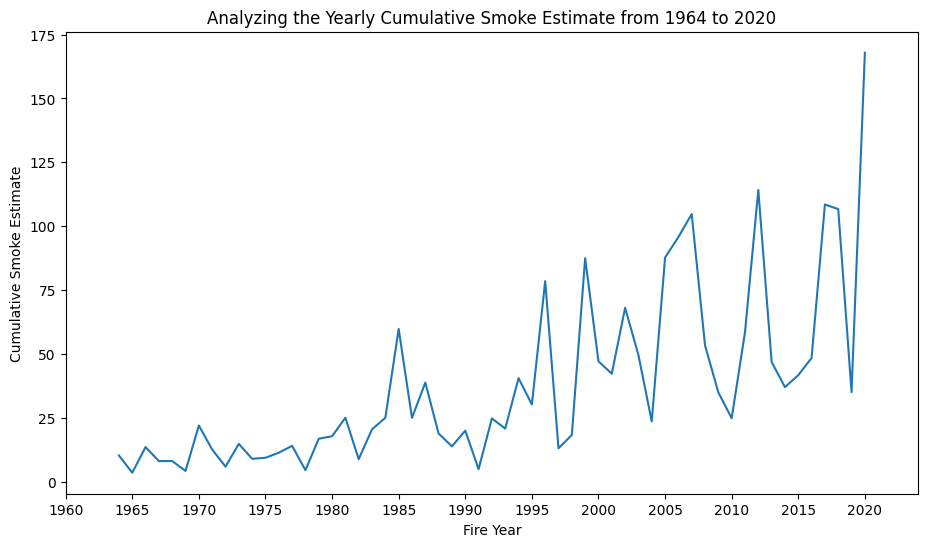

In [9]:
# Plot the cumulative smoke estimate with the fire year
plt.figure(figsize=(11, 6))
plt.plot(smoke_by_year['Fire_Year'], smoke_by_year['Smoke_Estimate'])

# Set labels and show plot
plt.xlabel('Fire Year')
plt.ylabel('Cumulative Smoke Estimate')
plt.title('Analyzing the Yearly Cumulative Smoke Estimate from 1964 to 2020')
plt.xlim([1960, 2024]) 
plt.xticks(np.arange(1960, 2024, 5))
plt.show()

### Step 5: Collecting National Park Visitor Statistics

**Tourism Data**:
   - Visitor counts for California's national parks from 1964–2020. (Table below shows the distance of each National park from Palmdale, CA in miles)
   - Monthly and yearly visitor counts are available.

**Steps Performed after Data Collection**:
- Removed null or missing values and replaced NaN with 0
- Standardized visitor counts across parks.
- Merged datasets on year for combined analysis.





| National Park                 | Approximate Distance from Palmdale (miles) |
|-------------------------------|--------------------------------------------|
| **Santa Monica Mountains**    | 66                                     |
| **Joshua Tree**               | 142                                       |
| **Channel Islands**           | 150                                     |
| **Death Valley**              | 157                                       |
| **Sequoia**                   | 192                                       |
| **Kings Canyon**              | 222                                       |
| **Pinnacles**                 | 256                                       |
| **Yosemite**                  | 262                                       |
| **Lassen Volcanic**           | 552                                       |
| **Redwood National and State Parks** | 673                                |


### Plot to show the distances of each park from Palmdale, CA in a bar chart

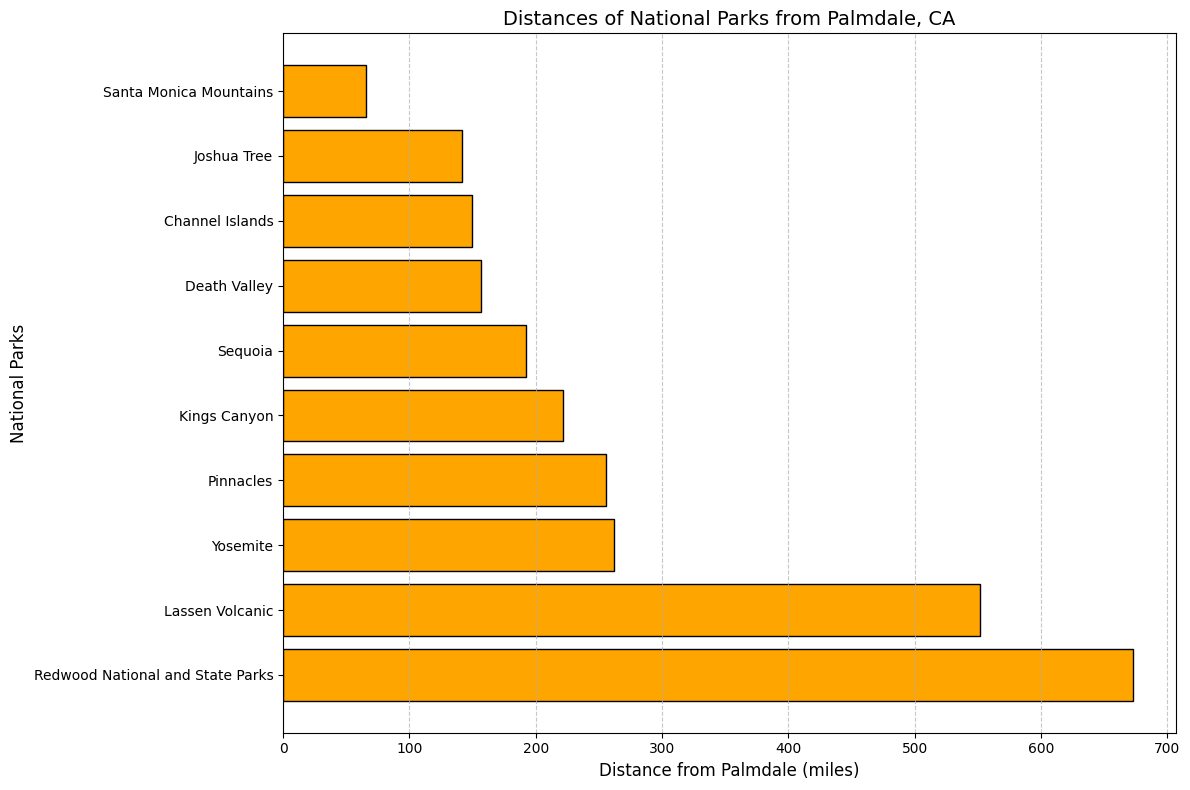

In [44]:
# Distance Data from Basic Google Search
park_names = [
    "Santa Monica Mountains", "Joshua Tree", "Channel Islands", 
    "Death Valley", "Sequoia", "Kings Canyon", "Pinnacles", 
    "Yosemite", "Lassen Volcanic", "Redwood National and State Parks"
]
distances = [66, 142, 150, 157, 192, 222, 256, 262, 552, 673]

# Plot
plt.figure(figsize=(12, 8))
plt.barh(park_names, distances, color='orange', edgecolor='black')

# Add labels, title, and grid
plt.xlabel('Distance from Palmdale (miles)', fontsize=12)
plt.ylabel('National Parks', fontsize=12)
plt.title('Distances of National Parks from Palmdale, CA', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Highest value on top

# Show the plot
plt.tight_layout()
plt.savefig('../Results/park_distances.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


In [10]:
joshua = pd.read_csv("../Data/Joshua.csv")
joshua['Park_Name'] = "Joshua"
joshua.rename(columns={'Textbox5': 'Year_Total'}, inplace=True)
joshua.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Year_Total,Park_Name
0,2024,"251,664","283,582","401,378","343,806","259,803","171,606","123,786","143,049","157,399","212,097",NaN,NaN,"2,348,170",Joshua
1,2023,"285,621","303,933","434,257","390,555","263,984","212,700","144,420","156,172","189,383","233,697","313,688","341,994","3,270,404",Joshua
2,2022,"277,128","302,834","431,849","358,701","228,627","159,177","149,070","135,137","150,533","222,629","316,911","325,698","3,058,294",Joshua
3,2021,"229,995","285,687","375,049","383,735","285,611","181,050","125,568","123,163","163,241","213,088","334,802","363,411","3,064,400",Joshua
4,2020,"268,187","298,294","226,600",0,"89,831","184,139","147,037","134,518","168,181","253,877","360,238","268,640","2,399,542",Joshua


In [11]:
yosemite = pd.read_csv("../Data/Yosemite.csv")
yosemite['Park_Name'] = "Yosemite"
yosemite.rename(columns={'Textbox5': 'Year_Total'}, inplace=True)
yosemite.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Year_Total,Park_Name
0,2024,"127,789","121,027","147,102","234,232","409,748","566,111","574,270","547,217","537,313","454,818",NaN,NaN,"3,719,627",Yosemite
1,2023,"107,256","107,012","25,005","205,802","322,308","487,618","580,357","593,378","559,464","488,566","252,249","168,055","3,897,070",Yosemite
2,2022,"137,057","170,196","192,634","285,601","380,905","470,045","396,833","518,407","424,374","381,612","178,786","131,100","3,667,550",Yosemite
3,2021,"67,284","128,222","159,906","257,158","348,006","429,980","509,874","432,038","356,030","284,611","185,213","129,273","3,287,595",Yosemite
4,2020,"132,742","167,778","92,324",0,0,"236,534","501,068","375,226","258,561","249,827","136,799","117,454","2,268,313",Yosemite


In [12]:
kings_canyon = pd.read_csv("../Data/Kings_Canyon.csv")
kings_canyon['Park_Name'] = "Kings Canyon"
kings_canyon.rename(columns={'Textbox5': 'Year_Total'}, inplace=True)
kings_canyon.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Year_Total,Park_Name
0,2024,"15,631","12,782","19,070","31,276","88,904","99,922","116,045","108,771","88,886","66,519",NaN,NaN,"647,806",Kings Canyon
1,2023,"14,363","14,944","1,481","27,530","69,344","126,318","109,259","81,074","88,018","56,050","31,780","22,904","643,065",Kings Canyon
2,2022,"21,971","14,419","19,744","36,642","79,247","94,402","120,676","89,257","81,801","53,287","18,222","11,318","640,986",Kings Canyon
3,2021,"27,701","21,653","18,571","37,148","82,199","104,953","117,408","77,706","23,595","10,991","27,376","13,617","562,918",Kings Canyon
4,2020,"19,845","17,975","6,605",0,0,"60,989","101,797","95,540","42,936","40,030","21,121","8,239","415,077",Kings Canyon


In [13]:
channel = pd.read_csv("../Data/Channel.csv")
channel['Park_Name'] = "Channel"
channel.rename(columns={'Textbox5': 'Year_Total'}, inplace=True)
channel.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Year_Total,Park_Name
0,2024,"10,017","9,925","10,913",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"30,855",Channel
1,2023,"12,950","19,726","25,063","27,243","30,918","36,635","38,390","31,076","31,607","28,935","27,115","19,088","328,746",Channel
2,2022,"16,968","21,175","25,048","30,769","23,636","30,138","37,853","33,844","31,120","27,647","27,468","17,579","323,245",Channel
3,2021,"1,684","13,176","13,914","22,512","28,239","40,977","41,381","36,839","37,121","35,612","30,330","17,467","319,252",Channel
4,2020,"18,955","20,318","13,408",365,"2,514","13,740","15,323","18,462","18,147","26,302","16,745","3,011","167,290",Channel


In [14]:
death_valley = pd.read_csv("../Data/Death_Valley.csv")
death_valley['Park_Name'] = "Death Valley"
death_valley.rename(columns={'Textbox5': 'Year_Total'}, inplace=True)
death_valley.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Year_Total,Park_Name
0,2024,"85,415","123,912","161,476","165,429","139,306","69,830","99,078","110,156","105,022",NaN,NaN,NaN,"1,059,624",Death Valley
1,2023,"84,177","115,023","145,647","144,868","113,857","81,845","86,776","81,202",0,"41,089","98,719","106,429","1,099,632",Death Valley
2,2022,"92,212","124,091","182,052","108,984","92,601","84,768","84,575","48,242","54,672","53,764","93,445","109,456","1,128,862",Death Valley
3,2021,"80,263","109,242","171,617","140,477","80,770","56,077","52,909","42,775","55,804","108,985","133,130","114,502","1,146,551",Death Valley
4,2020,"99,063","127,628","112,464","18,361","19,994","29,404","42,566","39,387","38,762","66,744","131,552","94,098","820,023",Death Valley


In [15]:
santa_monica = pd.read_csv("../Data/Santa_Monica.csv")
santa_monica['Park_Name'] = "Santa Monica"
santa_monica.rename(columns={'Textbox5': 'Year_Total'}, inplace=True)
santa_monica.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Year_Total,Park_Name
0,2024,"103,355","35,527","43,829","53,083","64,247","47,915","54,490","52,163","55,991","66,672",850,NaN,"578,122",Santa Monica
1,2023,"62,289","64,835","65,834","69,260","82,057","66,553","61,765","50,709","64,784","52,494","60,961","57,811","759,352",Santa Monica
2,2022,"73,078","71,688","76,134","72,916","82,842","55,298","61,599","70,109","48,830","64,965","60,648","57,110","795,217",Santa Monica
3,2021,"84,730","74,963","76,883","88,727","78,606","64,485","59,475","64,009","58,379","66,395","57,108","56,691","830,451",Santa Monica
4,2020,"81,385","62,760","46,401",0,"49,181","69,538","90,349","56,167","61,274","62,938","81,811","71,772","733,576",Santa Monica


In [16]:
sequoia = pd.read_csv("../Data/Sequoia.csv")
sequoia['Park_Name'] = "Sequoia"
sequoia.rename(columns={'Textbox5': 'Year_Total'}, inplace=True)
sequoia.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Year_Total,Park_Name
0,2024,"48,087","38,250","67,764","88,326","137,566","123,835","212,834","199,189","148,582","117,625",NaN,NaN,"1,182,058",Sequoia
1,2023,"26,006","31,190","5,214","29,029","73,576","87,230","186,932","171,867","142,544","106,350","68,745","51,884","980,567",Sequoia
2,2022,"32,564","39,182","58,365","86,412","121,934","135,869","188,020","170,284","127,041","96,663","55,800","41,064","1,153,198",Sequoia
3,2021,"65,177","54,162","79,431","103,101","134,360","162,201","182,423","155,567","50,597","22,545","25,406","24,578","1,059,548",Sequoia
4,2020,"46,368","48,821","16,625",0,0,"52,901","194,892","187,702","88,313","65,370","66,044","29,050","796,086",Sequoia


In [17]:
lassen = pd.read_csv("../Data/Lassen_volcanic.csv")
lassen['Park_Name'] = "Lassen Volcanic"
lassen.rename(columns={'Textbox5': 'Year_Total'}, inplace=True)
lassen.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Year_Total,Park_Name
0,2024,"7,116","6,786","6,072","6,978","34,227","72,903","92,058","16,641","56,526","42,657",NaN,NaN,"341,964",Lassen Volcanic
1,2023,"5,475","5,775","5,775","6,180","23,184","52,352","103,383","83,646","69,877","44,773","9,495","9,063","418,978",Lassen Volcanic
2,2022,"9,894","8,184","7,764","13,539","21,836","70,558","110,025","94,788","53,204","41,193","9,063","6,243","446,291",Lassen Volcanic
3,2021,"10,455","8,616","8,847","18,873","53,906","105,549","120,113",558,0,"14,856","11,484","6,378","359,635",Lassen Volcanic
4,2020,"10,770","11,655","6,933",0,"3,108","83,355","135,668","120,112","67,992","72,363","16,947","13,371","542,274",Lassen Volcanic


In [18]:
pinnacles = pd.read_csv("../Data/Pinnacles.csv")
pinnacles['Park_Name'] = "Pinnacles"
pinnacles.rename(columns={'Textbox5': 'Year_Total'}, inplace=True)
pinnacles.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Year_Total,Park_Name
0,2024,"21,517","20,006","44,547","35,849","36,859","32,430","24,309","24,940","23,964","25,615",NaN,NaN,"290,036",Pinnacles
1,2023,"11,164","21,898","26,109","56,339","43,708","26,468","38,823","22,034","21,513","23,037","23,851","26,276","341,220",Pinnacles
2,2022,"27,724","30,673","34,712","23,642","27,948","22,256","19,551","19,330","13,898","17,184","21,697","16,408","275,023",Pinnacles
3,2021,"26,793","31,316","38,402","39,597","40,064","37,029","29,502","18,765","21,721","23,448","23,187","19,033","348,857",Pinnacles
4,2020,"23,959","22,021","18,537","1,635","4,640","10,364","10,508","8,526","5,850","15,722","23,139","20,839","165,740",Pinnacles


In [19]:
redwood = pd.read_csv("../Data/Redwood.csv")
redwood['Park_Name'] = "Redwood"
redwood.rename(columns={'Textbox5': 'Year_Total'}, inplace=True)
redwood.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Year_Total,Park_Name
0,2023,"15,304","19,542","22,212","32,444","49,794","55,601","48,652","45,993","46,687","40,581","19,835","12,460","409,105",Redwood
1,2022,"20,630","20,202","27,390","34,053","44,887","59,736","68,544","60,003","49,954","38,004","19,904","15,093","458,400",Redwood
2,2021,"19,790","19,708","20,645","24,290","43,346","53,024","56,573","58,121","57,927","38,708","23,828","19,919","435,879",Redwood
3,2020,"24,128","21,201","9,079","5,212","25,258","29,408","39,126","38,488","21,343","21,833","15,981","14,120","265,177",Redwood
4,2019,"17,129","17,768","30,938","33,179","62,796","76,137","69,750","55,227","55,568","42,048","24,430","19,752","504,722",Redwood


### Step 6: Exploratory Data Analysis on Visitor trends and Smoke estimates

In this section, we examine the data to identify key patterns and trends:

1. **Visitor Trends**:
   - Monthly and yearly trends in visitor counts across parks.
   - Seasonal spikes in summer months.

2. **Smoke Estimates**:
   - Annual smoke estimates from wildfires.
   - Correlation analysis between smoke and visitor counts.

**Visualizations**:
- Line plots for visitor trends by park.
- Scatter plots showing smoke estimates versus visitor counts.


Combining the dataframes to have a composite dataset of all the parks visitor statistics in a single dataframe.

In [20]:
all_park_dfs = [joshua, yosemite, kings_canyon, channel, death_valley, santa_monica, sequoia, lassen, pinnacles, redwood]
# Combine all dataframes into a single dataframe
combined_df = pd.concat(all_park_dfs, ignore_index=True)
combined_df

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Year_Total,Park_Name
0,2024,"251,664","283,582","401,378","343,806","259,803","171,606","123,786","143,049","157,399","212,097",NaN,NaN,"2,348,170",Joshua
1,2023,"285,621","303,933","434,257","390,555","263,984","212,700","144,420","156,172","189,383","233,697","313,688","341,994","3,270,404",Joshua
2,2022,"277,128","302,834","431,849","358,701","228,627","159,177","149,070","135,137","150,533","222,629","316,911","325,698","3,058,294",Joshua
3,2021,"229,995","285,687","375,049","383,735","285,611","181,050","125,568","123,163","163,241","213,088","334,802","363,411","3,064,400",Joshua
4,2020,"268,187","298,294","226,600",0,"89,831","184,139","147,037","134,518","168,181","253,877","360,238","268,640","2,399,542",Joshua
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,1983,"15,614","21,535","23,239","22,221","40,274","54,382","93,768","84,910","60,044","25,808","17,114","14,802","473,711",Redwood
452,1982,"15,077","14,905","15,718","21,430","41,762","57,898","90,816","83,035","54,460","39,089","20,230","12,706","467,126",Redwood
453,1981,"17,493","17,545","25,734","36,115","46,132","70,230","94,825","107,092","61,548","37,740","18,829","16,178","549,461",Redwood
454,1980,"19,593","19,397","25,132","26,851","33,505","52,414","78,046","74,621","56,715","35,561","20,664","29,211","471,710",Redwood


In [21]:
# Replace NaN with 0
combined_df.fillna(0, inplace=True)

In [22]:
# Convert the monthly columns to integers (remove commas)
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
for col in monthly_columns:
    combined_df[col] = combined_df[col].replace(',', '', regex=True).astype(int)



### Subplots in grid pattern showing all 10 National Parks Visitor statistics over months seperately

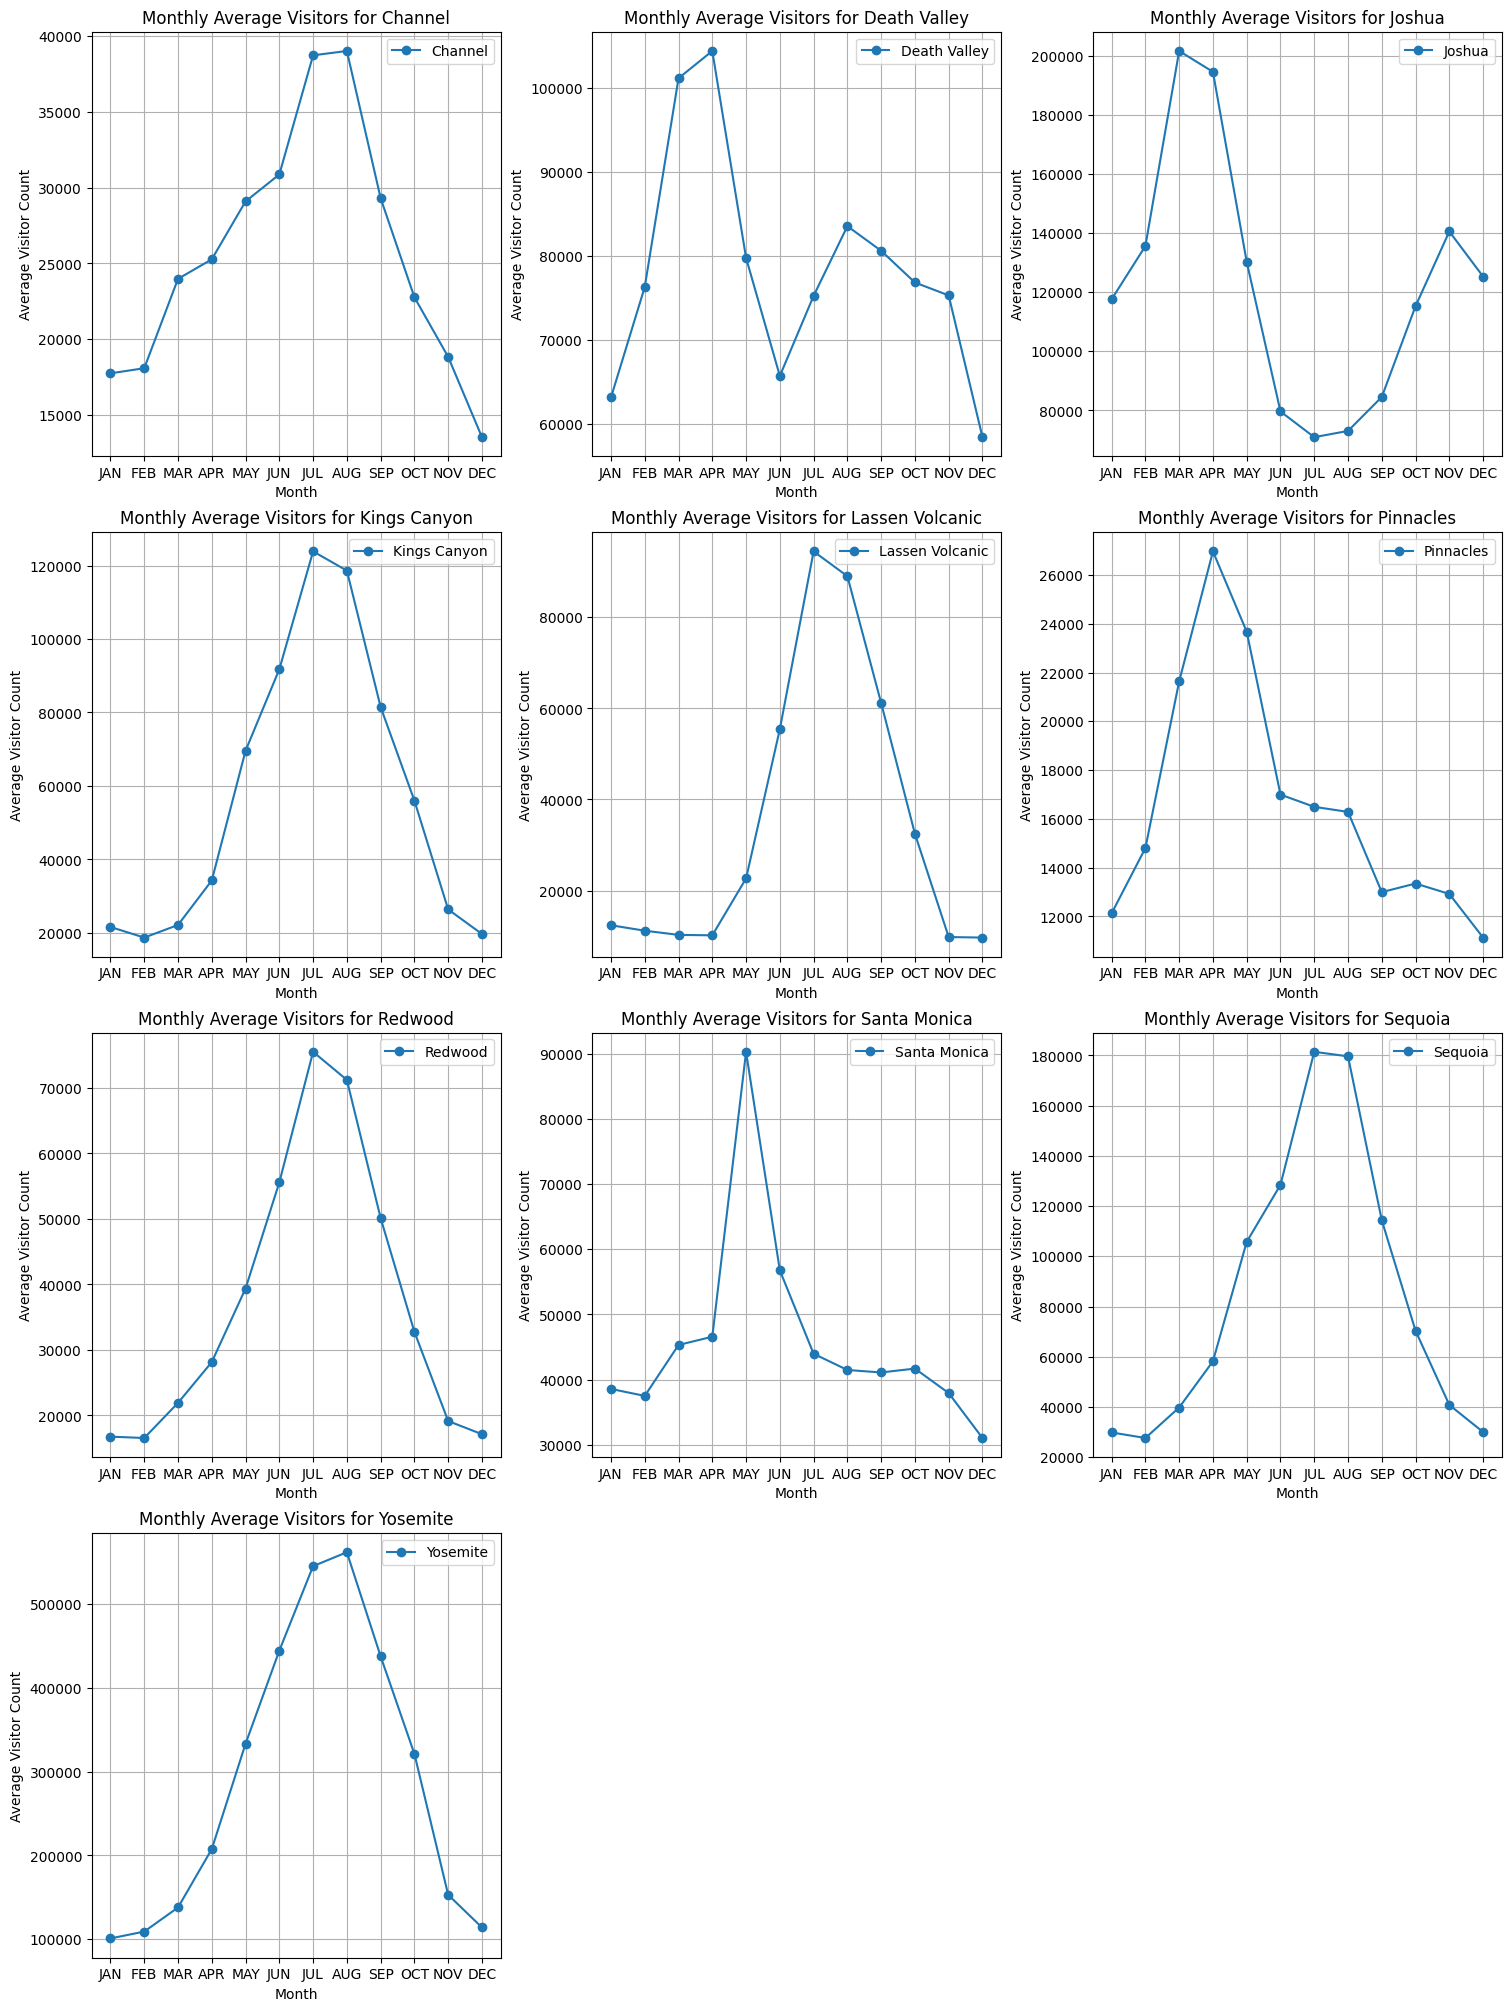

In [23]:
# Calculate monthly averages across all years for each park
monthly_avg_df = combined_df.groupby('Park_Name')[monthly_columns].mean().reset_index()


# Setup the grid for subplots
parks = monthly_avg_df['Park_Name'].unique()
num_parks = len(parks)
rows = (num_parks + 2) // 3  # 3 plots per row
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5), constrained_layout=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot data for each park
for i, park in enumerate(parks):
    park_data = monthly_avg_df[monthly_avg_df['Park_Name'] == park]
    axes[i].plot(monthly_columns, park_data[monthly_columns].values.flatten(), marker='o', label=f"{park}")
    axes[i].set_title(f"Monthly Average Visitors for {park}")
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Average Visitor Count')
    axes[i].grid(True)
    axes[i].legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plots
plt.savefig('../Results/monthly_average_visitor_count_by_park.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### Plot showing all 10 National Parks Visitor statistics over years (1964-2024) all together

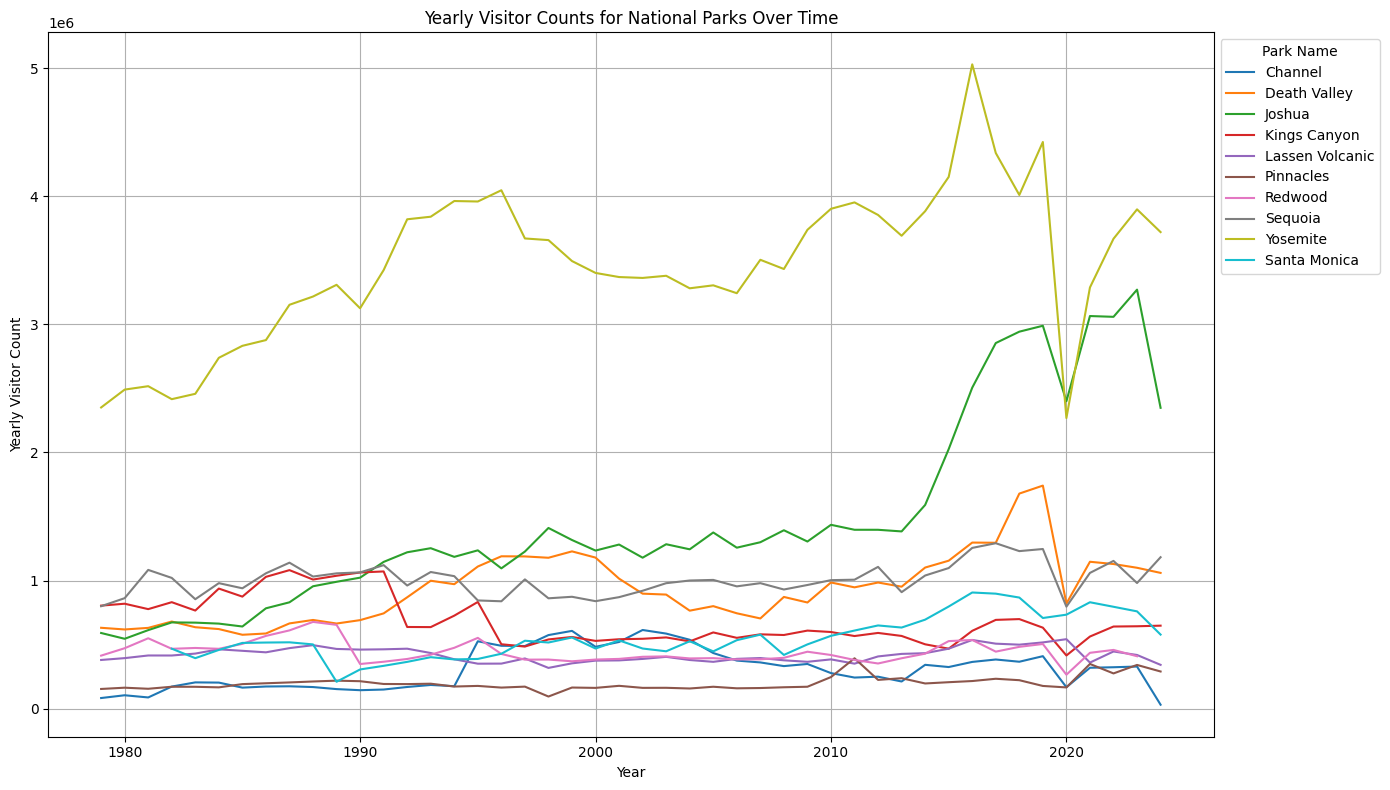

In [24]:

# Aggregate the data to yearly visitor totals for each park
combined_df['Year_Total'] = combined_df['Year_Total'].replace(',', '', regex=True).astype(float)  # Clean commas
df_yearly = combined_df.groupby(['Year', 'Park_Name'])['Year_Total'].sum().reset_index()

# Plot the data
plt.figure(figsize=(14, 8))
parks = df_yearly['Park_Name'].unique()

for park in parks:
    park_data = df_yearly[df_yearly['Park_Name'] == park]
    plt.plot(park_data['Year'], park_data['Year_Total'], label=park)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Yearly Visitor Count')
plt.title('Yearly Visitor Counts for National Parks Over Time')
plt.legend(title='Park Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.savefig('../Results/yearly_visitor_count_all_park.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### Plot showing all 10 National Parks Visitor statistics over years (1964-2024) seperately in grid

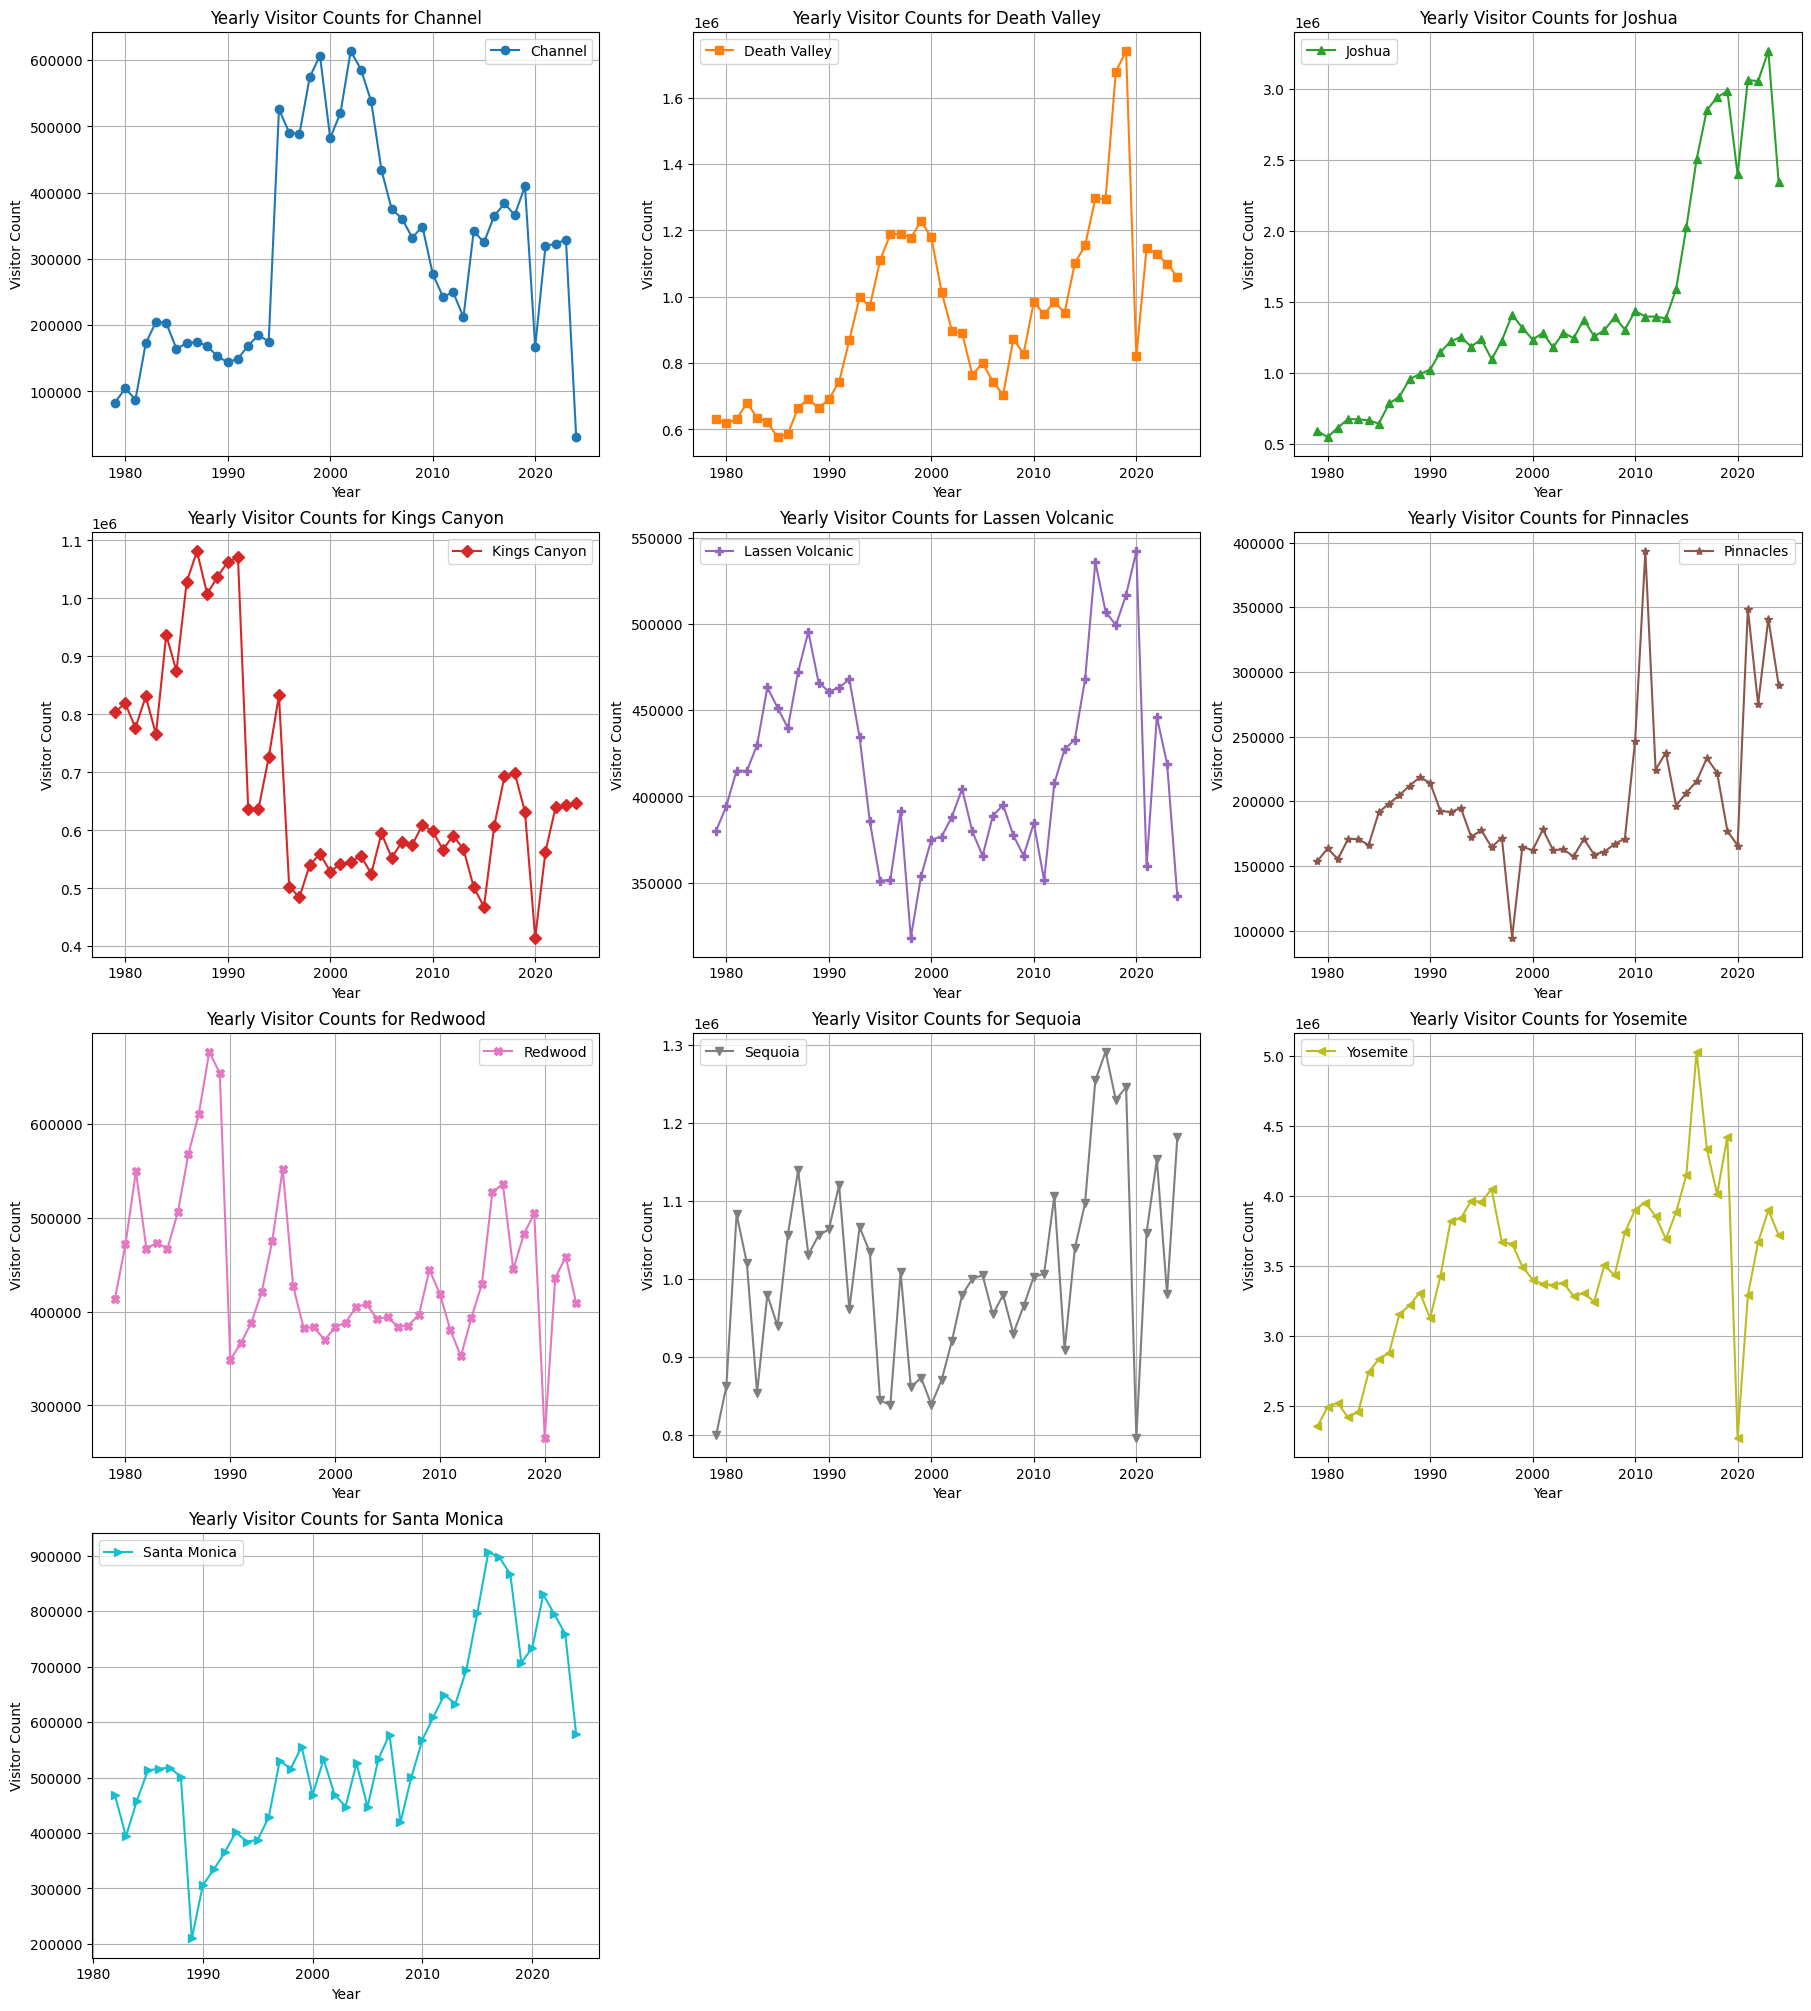

In [25]:
# Get list of parks and determine grid size
parks = df_yearly['Park_Name'].unique()
num_parks = len(parks)
rows = (num_parks + 2) // 3  # 3 plots per row

# Create subplots grid
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5), constrained_layout=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Define a color map and markers for variety
colors = plt.cm.tab10(np.linspace(0, 1, num_parks))
markers = ['o', 's', '^', 'D', 'P', '*', 'X', 'v', '<', '>']

# Plot each park in its own subplot
for i, park in enumerate(parks):
    park_data = df_yearly[df_yearly['Park_Name'] == park]
    ax = axes[i]
    ax.plot(park_data['Year'], park_data['Year_Total'], label=park, color=colors[i % len(colors)], marker=markers[i % len(markers)])
    ax.set_title(f"Yearly Visitor Counts for {park}")
    ax.set_xlabel('Year')
    ax.set_ylabel('Visitor Count')
    ax.grid(True)
    ax.legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plots
plt.savefig('../Results/yearly_visitor_count_each_park.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### Step 7: Correlation Analysis

We calculate the correlation between smoke estimates and visitor counts for each park to identify patterns.

**Key Findings**:
- Correlations vary across parks:
  - Positive correlation: Parks like Joshua Tree and Santa Monica.
  - Negative correlation: Parks like Kings Canyon and Redwood.

**Insights**:
- Parks closer to urban areas are less affected by smoke, potentially due to higher resilience or unaffected tourism demand.


In [26]:
df_yearly

,Year,Park_Name,Year_Total
0,1979,Channel,82937.0
1,1979,Death Valley,631152.0
2,1979,Joshua,590543.0
3,1979,Kings Canyon,804175.0
4,1979,Lassen Volcanic,380014.0
...,...,...,...
451,2024,Lassen Volcanic,341964.0
452,2024,Pinnacles,290036.0
453,2024,Santa Monica,578122.0
454,2024,Sequoia,1182058.0


In [27]:
# Rename Fire_Year column to Year to make merge with Park data easier later
smoke_by_year.rename(columns = {"Fire_Year":"Year"}, inplace=True)
smoke_by_year

,Year,Smoke_Estimate
0,1964,10.211164
1,1965,3.458062
2,1966,13.504803
3,1967,8.002194
4,1968,8.022790
5,1969,4.160344
6,1970,21.933398
7,1971,12.543684
8,1972,5.843266
9,1973,14.740287


In [28]:
# Merge smoke estimates with park data
merged_df = pd.merge(df_yearly, smoke_by_year, left_on='Year', right_on='Year')
merged_df


,Year,Park_Name,Year_Total,Smoke_Estimate
0,1979,Channel,82937.0,16.750618
1,1979,Death Valley,631152.0,16.750618
2,1979,Joshua,590543.0,16.750618
3,1979,Kings Canyon,804175.0,16.750618
4,1979,Lassen Volcanic,380014.0,16.750618
...,...,...,...,...
412,2020,Pinnacles,165740.0,167.905796
413,2020,Redwood,265177.0,167.905796
414,2020,Santa Monica,733576.0,167.905796
415,2020,Sequoia,796086.0,167.905796


In [29]:
# Group data by park and calculate correlation
correlation_results = {}

parks = merged_df['Park_Name'].unique()
for park in parks:
    park_data = merged_df[merged_df['Park_Name'] == park]
    correlation = park_data['Year_Total'].corr(park_data['Smoke_Estimate'])
    correlation_results[park] = correlation

# Sort correlation results in descending order
sorted_correlation = sorted(correlation_results.items(), key=lambda x: x[1], reverse=True)

# Print sorted correlation results
print("Correlation between Smoke Estimate and Visitors (sorted by descending order):")
for park, corr in sorted_correlation:
    print(f"{park}: {corr}")


Correlation between Smoke Estimate and Visitors (sorted by descending order):
Joshua: 0.5120584621417386
Santa Monica: 0.5096051513157079
Death Valley: 0.2589833510006072
Channel: 0.23657670900176286
Lassen Volcanic: 0.13973605843484282
Yosemite: 0.11740324983913297
Pinnacles: 0.0767931599131777
Sequoia: 0.0023443944291783644
Redwood: -0.400707107918158
Kings Canyon: -0.46035569943652443


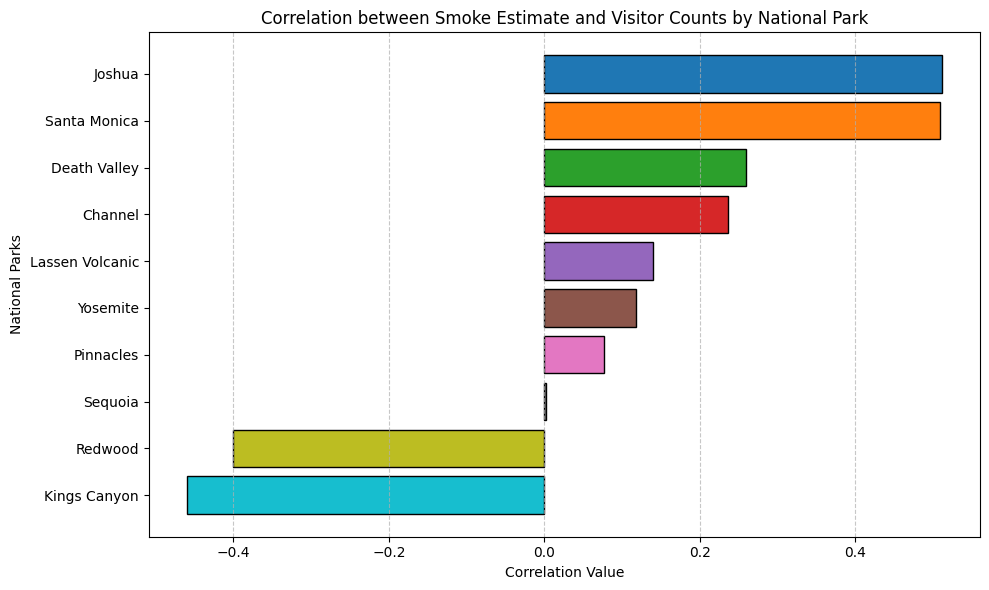

In [33]:
# Extract park names and correlations for plotting
park_names = [item[0] for item in sorted_correlation]
correlation_values = [item[1] for item in sorted_correlation]
colors = plt.cm.tab10(np.linspace(0, 1, len(park_names)))
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(park_names, correlation_values, color=colors, edgecolor='black')
plt.xlabel('Correlation Value')
plt.ylabel('National Parks')
plt.title('Correlation between Smoke Estimate and Visitor Counts by National Park')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.gca().invert_yaxis()  # To have the highest correlation on top
plt.savefig('../Results/correlation_bar_graph.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

Below scatterplot shows the relation between smoke estimates and National Park visitor count for Palmdale, CA. From the trend lines we can confirm again on the correlation between the two variables (whether positive, negative or null)

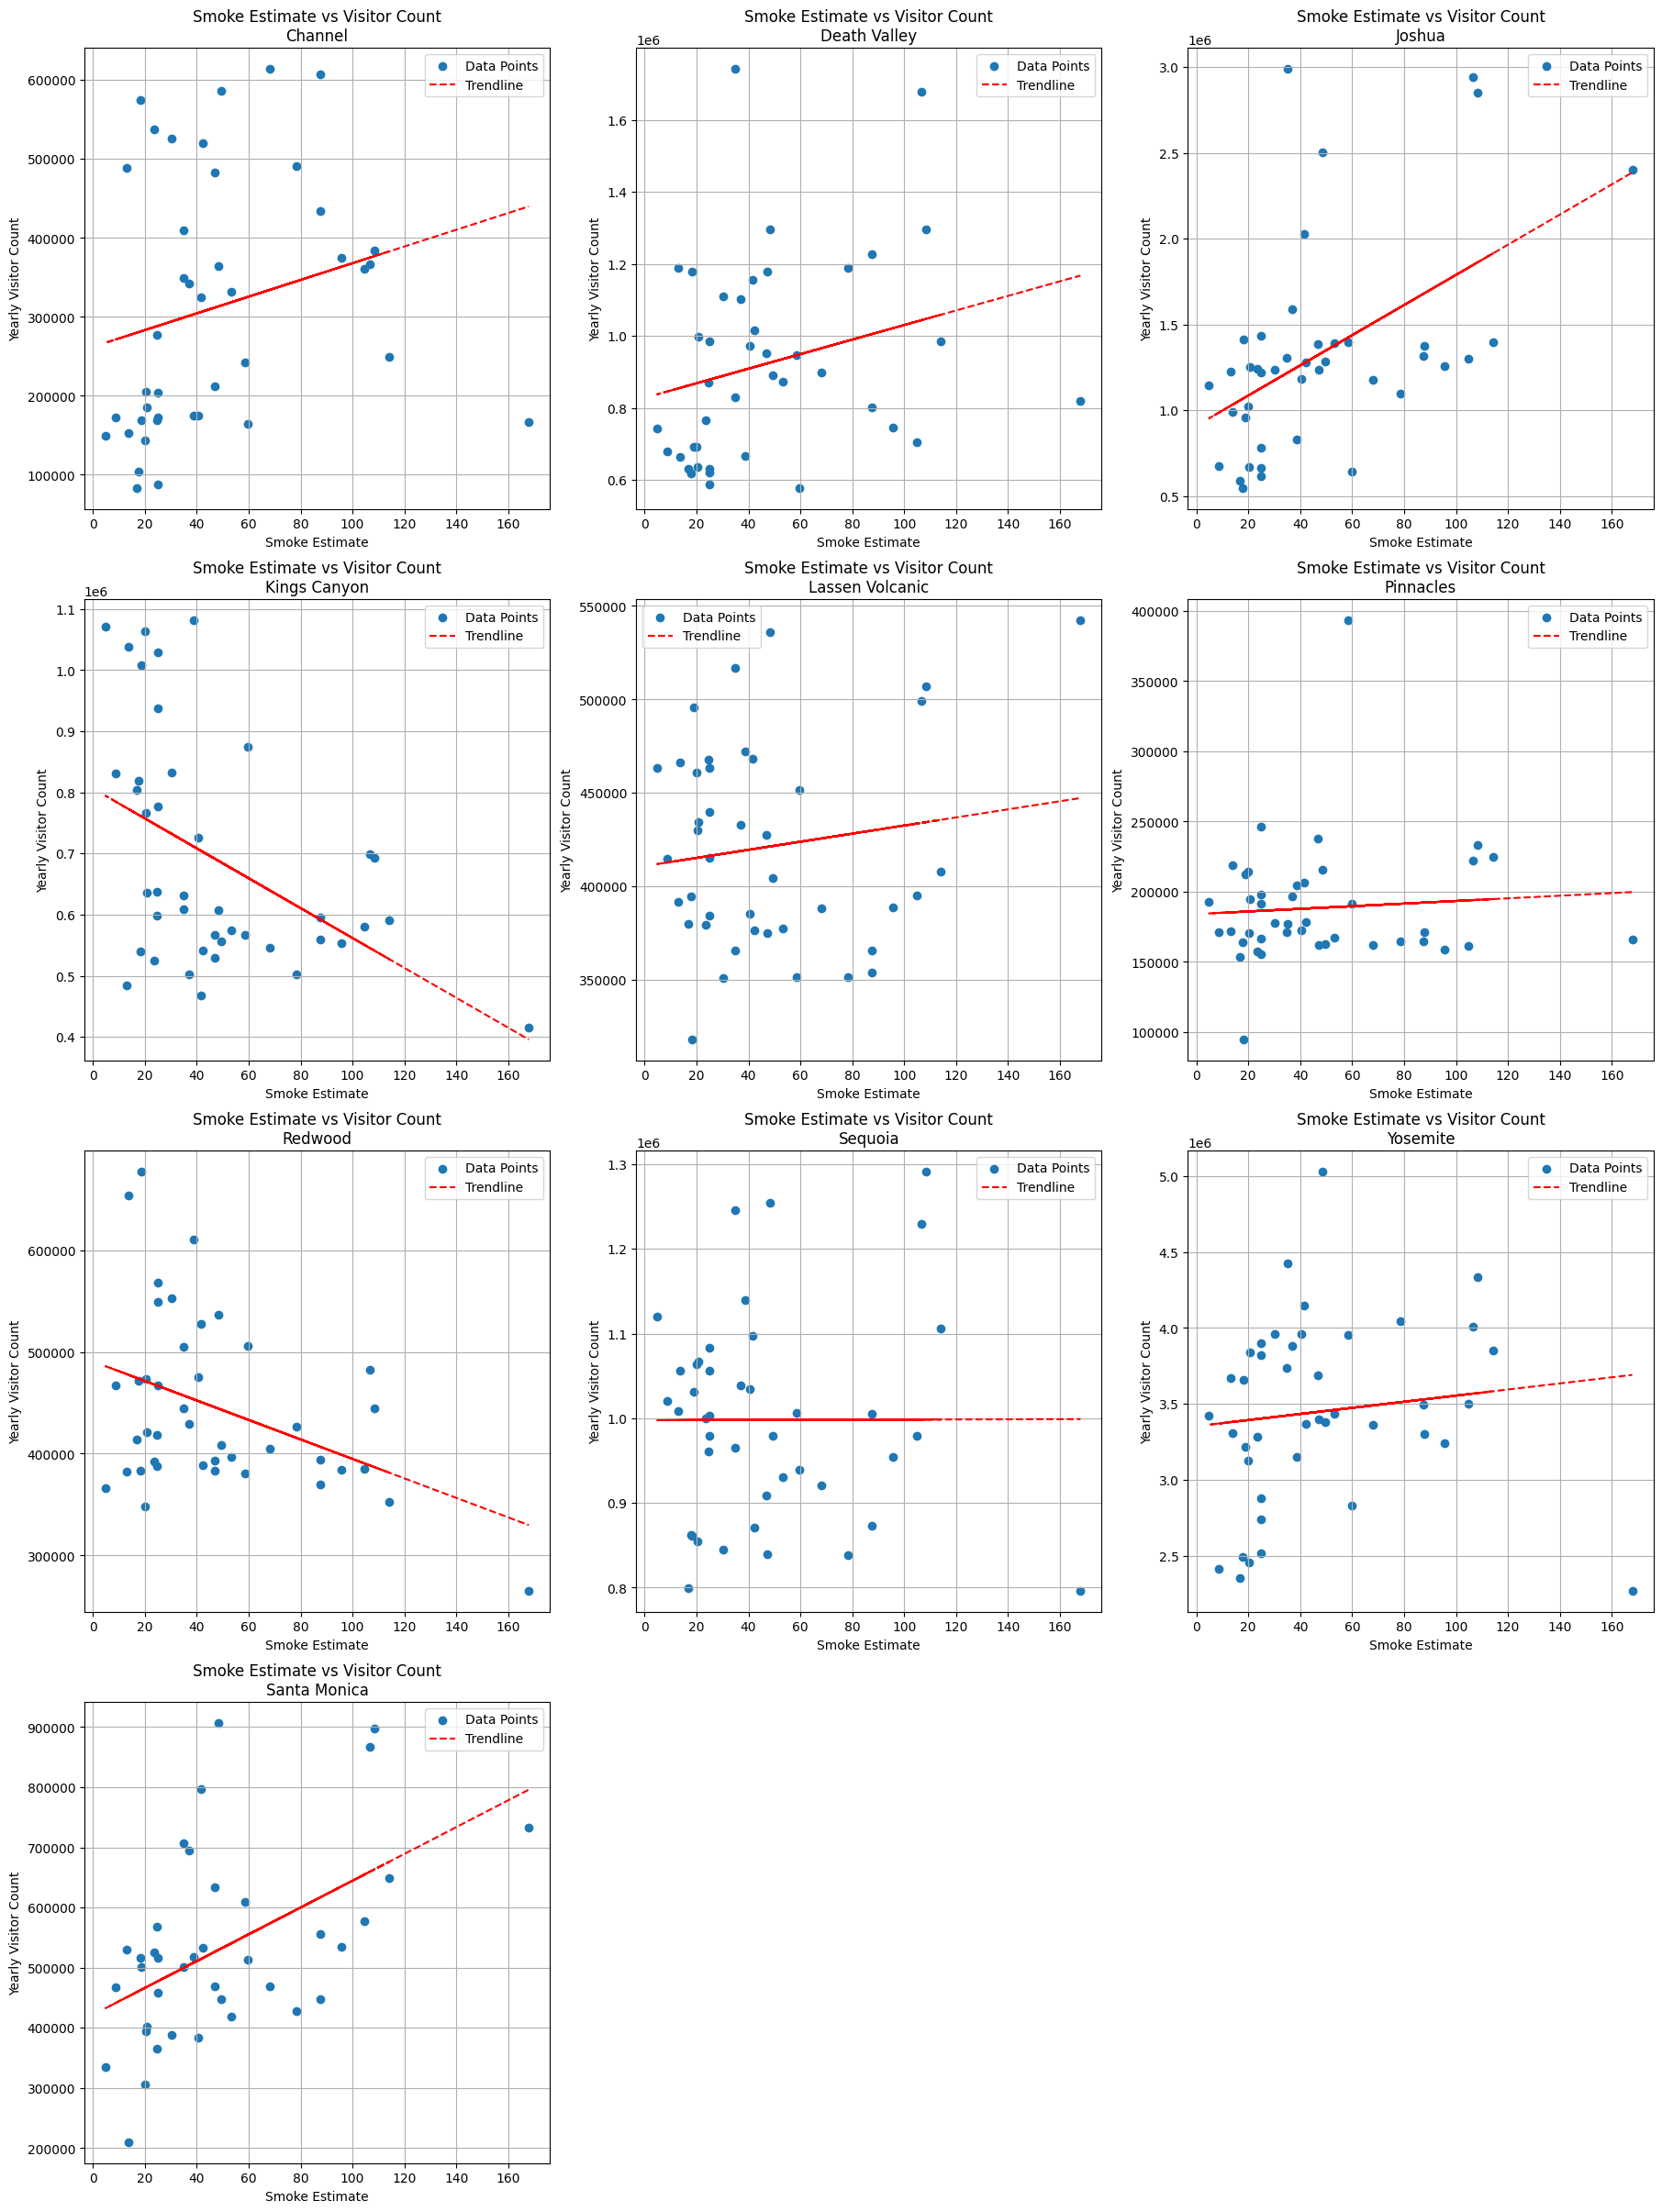

In [34]:

# Determine the number of parks
num_parks = len(parks)
rows = (num_parks + 2) // 3  # 3 plots per row
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 6), constrained_layout=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot scatter plots with trendlines for each park
for i, park in enumerate(parks):
    park_data = merged_df[merged_df['Park_Name'] == park]
    x = park_data['Smoke_Estimate']
    y = park_data['Year_Total']
    
    # Scatter plot
    axes[i].scatter(x, y, alpha=1, label="Data Points")
    
    # Compute and plot trendline
    if len(x) > 1:  # Ensure there's enough data for a trendline
        m, b = np.polyfit(x, y, 1)  # Linear regression (slope, intercept)
        axes[i].plot(x, m * x + b, color='red', linestyle='--', label="Trendline")
    
    # Set titles and labels
    axes[i].set_title(f"Smoke Estimate vs Visitor Count\n{park}")
    axes[i].set_xlabel("Smoke Estimate")
    axes[i].set_ylabel("Yearly Visitor Count")
    axes[i].grid(True)
    axes[i].legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the grid of plots
plt.savefig('../Results/smoke_estimate_vs_visitor_count.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


### Step 8:  Predictive Modeling

Using time-series forecasting models, we predict visitor counts and analyze future trends under varying smoke scenarios.

**Models Used**:
1. **SARIMAX (Seasonal ARIMA with eXogenous Variables)**:
   - Predicts yearly visitor counts based on historical data and smoke estimates.
   - Accounts for seasonality and trend changes.
   - Smoke Estimates prediction from 2021-2050


**Outputs**:
- Historical vs. predicted visitor counts for each park.
- Forecasted trends for 2021–2050 for both Smoke and Visitors


In [35]:
# Create a copy of the dataframe containing yearly cumulative smoke estimate data
sarimax_df = smoke_by_year.copy()

# Convert the year column to datetime and save it as a new column called 'date'
sarimax_df['date'] = pd.to_datetime(sarimax_df['Year'], errors='ignore', format='%Y')

# Set the above date column as the dataframe's index
sarimax_df = sarimax_df.set_index('date')

# Change the index to datetime object and convert into the type 'datetime64[ns]'
# It is important to convert it to the type 'datetime64[ns]' because the default type is numpy datetime
# A datetime format other than 'datetime64[ns]' throws an error while training the model
sarimax_df.index = pd.to_datetime(sarimax_df.index).astype('datetime64[ns]')

# We then drop the 'Fire_Year' column as it is no longer needed
sarimax_df.drop(['Year'], axis=1, inplace=True)

In [36]:
sarimax_df

,Smoke_Estimate
date,
1964-01-01,10.211164
1965-01-01,3.458062
1966-01-01,13.504803
1967-01-01,8.002194
1968-01-01,8.022790
1969-01-01,4.160344
1970-01-01,21.933398
1971-01-01,12.543684
1972-01-01,5.843266


In [37]:
# Fit a SARIMAX model
# Set the order and season_order parameters as per your requirements
# The fourth coordinate of the seasonal_order parameter is set to 12 for yearly data
model = sm.tsa.SARIMAX(sarimax_df['Smoke_Estimate'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Generate a list of years for our range of 1963 to 2020
years_range = np.arange(1964, 2021, 1)

# Create a datetime index with the type 'datetime64[ns]'
future_index = pd.to_datetime(years_range, format='%Y').astype('datetime64[ns]')

# Generate predictions using the start date, end date and the time-series index
forecast = results.get_prediction(start=future_index[0], end=future_index[-1], exog=sarimax_df.index)

# Extract the predicted mean values for the years 1963 to 2020
Y_pred = list(forecast.predicted_mean)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83511D+00    |proj g|=  2.22701D-01

At iterate    5    f=  3.78043D+00    |proj g|=  2.18004D-02

At iterate   10    f=  3.74999D+00    |proj g|=  1.55575D-02

At iterate   15    f=  3.74968D+00    |proj g|=  2.56732D-03

At iterate   20    f=  3.74915D+00    |proj g|=  4.13885D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     28      1     0     0   2.303D-05   3.749D+00
  F =   3.7491535085964278     

CONVERG

 This problem is unconstrained.


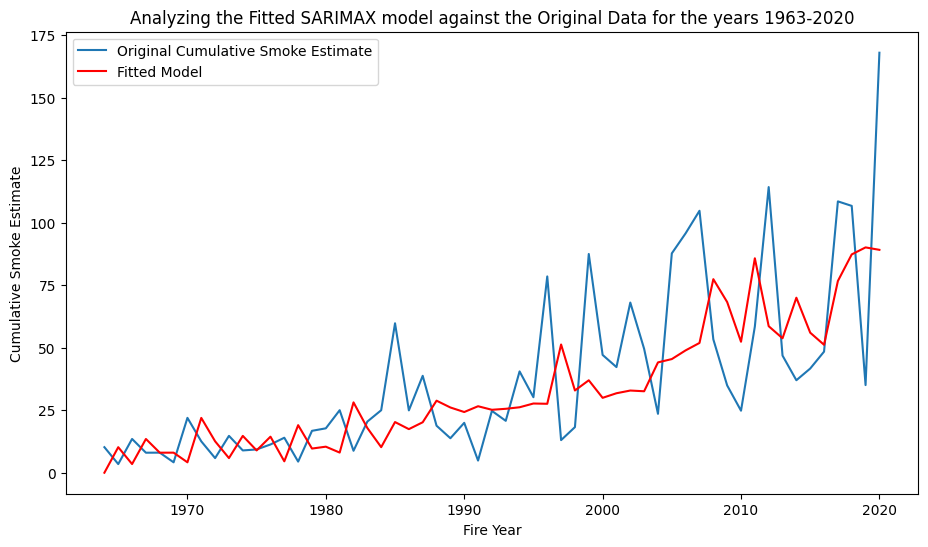

In [38]:
# Plot the original data with the fitted model
X = list(smoke_by_year['Year'])
Y = list(smoke_by_year['Smoke_Estimate'])

plt.figure(figsize=(11, 6))
plt.plot(X, Y, label='Original Cumulative Smoke Estimate')

# Plot the fitted model line
plt.plot(X, Y_pred, 'r-', label='Fitted Model')

# Set labels and show plot
plt.xlabel('Fire Year')
plt.ylabel('Cumulative Smoke Estimate')
plt.title('Analyzing the Fitted SARIMAX model against the Original Data for the years 1963-2020')
plt.legend()
plt.show()

In [39]:
# Generate a list of years for our range of 2021 to 2050
years_range = np.arange(2021, 2051, 1)

# Create a datetime index with the type 'datetime64[ns]'
future_index = pd.to_datetime(years_range, format='%Y').astype('datetime64[ns]')

# Generate predictions using the start date, end date and the time-series index
forecast = results.get_prediction(start=future_index[0], end=future_index[-1], exog=sarimax_df.index)

# Extract the predicted mean values for the years 2021 to 2049 and their confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

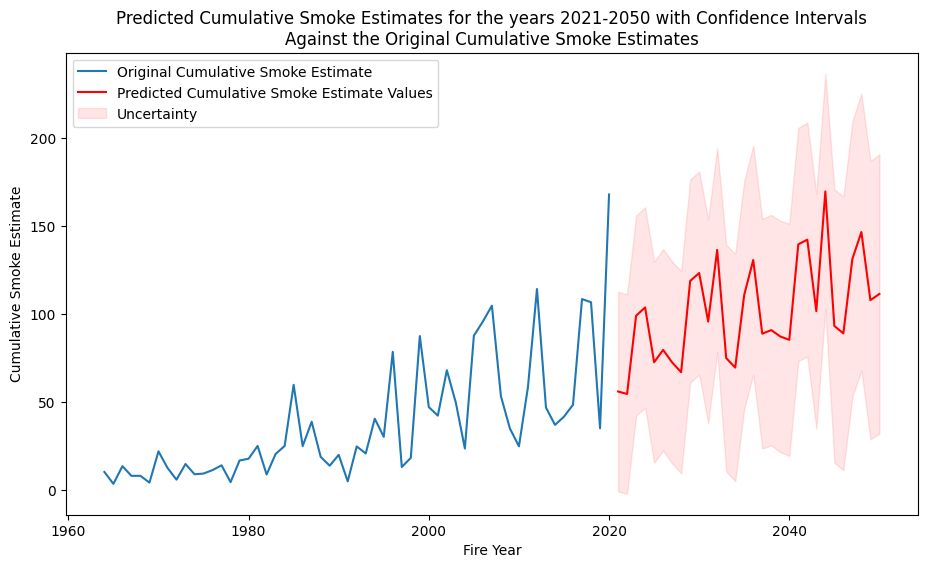

In [40]:
# Plot the actual data
plt.figure(figsize=(11, 6))
plt.plot(X, Y, label='Original Cumulative Smoke Estimate')

# Plot the predicted values
plt.plot(years_range, forecast_values, color='red', label='Predicted Cumulative Smoke Estimate Values')

# Plot the confidence intervals
plt.fill_between(
    years_range,
    list(confidence_intervals.iloc[:, 0]),
    list(confidence_intervals.iloc[:, 1]),
    color='red', alpha=0.1, label='Uncertainty'
)

# Set labels and show plot
plt.legend(loc='upper left')
plt.title('Predicted Cumulative Smoke Estimates for the years 2021-2050 with Confidence Intervals\n\
Against the Original Cumulative Smoke Estimates')
plt.xlabel('Fire Year')
plt.ylabel('Cumulative Smoke Estimate')
plt.savefig('../Results/smoke_estimates_predictions.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
# Create a copy of the dataframe to avoid modifying the original
standardized_df = merged_df.copy()

# standardization of the year_total by dividing by 10000 to make plotting with smoke estimate easier below
standardized_df['Year_Total'] = standardized_df['Year_Total']/10000

standardized_df


,Year,Park_Name,Year_Total,Smoke_Estimate
0,1979,Channel,8.2937,16.750618
1,1979,Death Valley,63.1152,16.750618
2,1979,Joshua,59.0543,16.750618
3,1979,Kings Canyon,80.4175,16.750618
4,1979,Lassen Volcanic,38.0014,16.750618
...,...,...,...,...
412,2020,Pinnacles,16.5740,167.905796
413,2020,Redwood,26.5177,167.905796
414,2020,Santa Monica,73.3576,167.905796
415,2020,Sequoia,79.6086,167.905796


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90230D+01    |proj g|=  1.43340D-02
  ys=-1.407E+02  -gs= 5.244E-01 BFGS update SKIPPED
  ys=-3.866E+02  -gs= 5.256E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     39      3     2     0   2.843D+03   1.259D+01
  F =   12.588839687484493     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  1.65588D+00    |proj g|=  4.09617D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     33      1     0     0   4.096D-06   1.656D+00
  F =   1.6558813446633440     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67603D+00    |proj g|=  1.90877D-01

At iterate    5    f=  1.52108D+00    |proj g|=  7.38440D-03

At iterate   10    f=  1.50539D+00    |proj g|=  3.94757D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  9.69513D-01    |proj g|=  4.05568D-02

At iterate   20    f=  9.68422D-01    |proj g|=  8.24014D-03

At iterate   25    f=  9.68073D-01    |proj g|=  5.68817D-03

At iterate   30    f=  9.68053D-01    |proj g|=  4.73505D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     44      1     0     0   4.735D-06   9.681D-01
  F =  0.96805258785096115     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.98927D+00    |proj g|=  1.14018D-03

At iterate   15    f=  1.98856D+00    |proj g|=  1.86608D-02

At iterate   20    f=  1.98531D+00    |proj g|=  1.31780D-02

At iterate   25    f=  1.98526D+00    |proj g|=  5.35918D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     34      1     0     0   4.188D-06   1.985D+00
  F =   1.9852620343299381     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


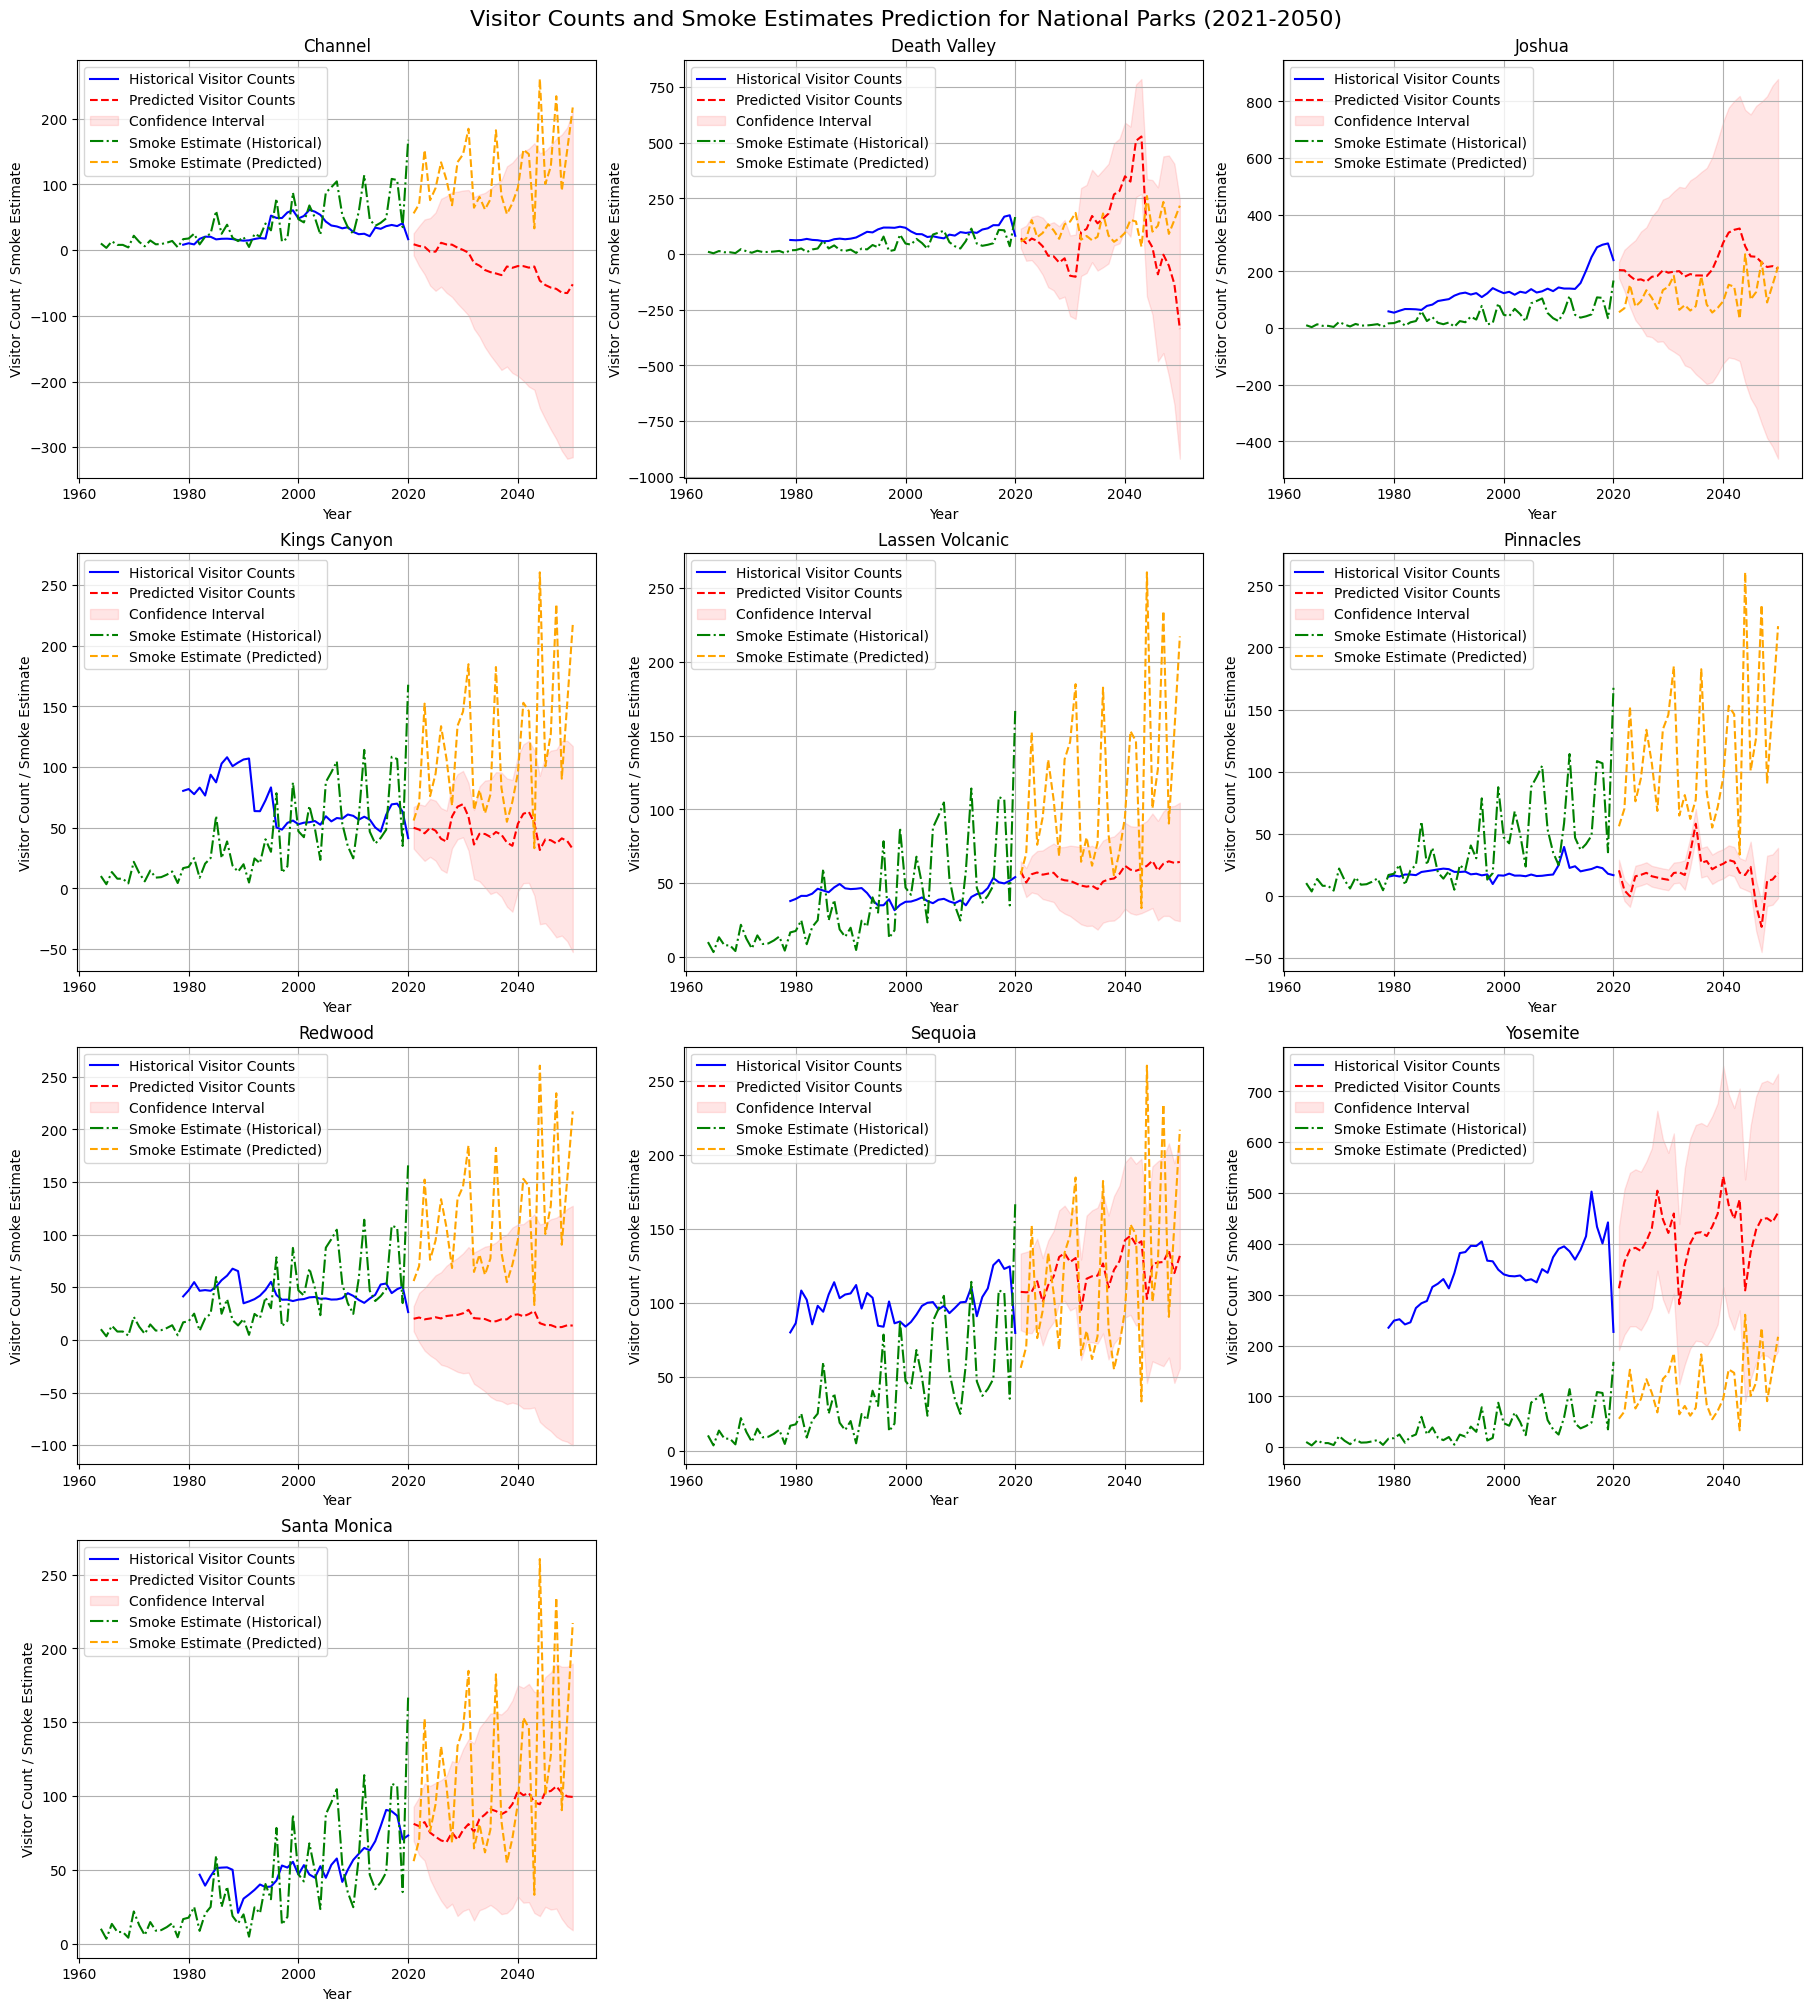

In [42]:
# Ensure Year is numeric
standardized_df['Year'] = pd.to_numeric(standardized_df['Year'])
smoke_by_year['Year'] = pd.to_numeric(smoke_by_year['Year'])

# Get the list of parks
parks = standardized_df['Park_Name'].unique()

# Define the number of rows and columns for the grid
num_parks = len(parks)
rows = (num_parks + 2) // 3  # 3 plots per row
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5), constrained_layout=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Prepare the smoke estimate SARIMAX model
smoke_by_year['date'] = pd.to_datetime(smoke_by_year['Year'], format='%Y')
smoke_by_year.set_index('date', inplace=True)
smoke_model = sm.tsa.SARIMAX(
    smoke_by_year['Smoke_Estimate'], 
    order=(1, 1, 1), 
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
smoke_results = smoke_model.fit()

# Forecast future smoke estimate values (2021-2050)
years_future_smoke = np.arange(2021, 2051)
future_index_smoke = pd.to_datetime(years_future_smoke, format='%Y')
smoke_forecast = smoke_results.get_prediction(start=future_index_smoke[0], end=future_index_smoke[-1])
smoke_forecast_values = smoke_forecast.predicted_mean

# Loop through each park
for i, park in enumerate(parks):
    ax = axes[i]
    park_data = standardized_df[standardized_df['Park_Name'] == park]
    
    # Prepare the data for SARIMAX
    sarimax_park_df = park_data[['Year', 'Year_Total']].copy()
    sarimax_park_df['date'] = pd.to_datetime(sarimax_park_df['Year'], format='%Y')
    sarimax_park_df.set_index('date', inplace=True)
    sarimax_park_df.drop(['Year'], axis=1, inplace=True)
    
    # Fit the SARIMAX model
    try:
        model = sm.tsa.SARIMAX(
            sarimax_park_df['Year_Total'], 
            order=(1, 1, 1), 
            seasonal_order=(1, 1, 1, 12),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        results = model.fit()
    except Exception as e:
        ax.text(0.5, 0.5, f"Error: {e}", ha="center", va="center", fontsize=12)
        continue

    # Historical data
    years_hist = sarimax_park_df.index.year
    visitor_counts_hist = sarimax_park_df['Year_Total']
    
    # Forecast future values (2021-2050)
    years_future = np.arange(2021, 2051)
    future_index = pd.to_datetime(years_future, format='%Y')
    forecast = results.get_prediction(start=future_index[0], end=future_index[-1])
    
    forecast_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()

    # Plot the historical and forecasted visitor data
    ax.plot(years_hist, visitor_counts_hist, label="Historical Visitor Counts", color="blue")
    ax.plot(years_future, forecast_values, label="Predicted Visitor Counts", color="red", linestyle="--")
    
    # Plot confidence intervals
    ax.fill_between(
        years_future,
        confidence_intervals.iloc[:, 0],
        confidence_intervals.iloc[:, 1],
        color='red', alpha=0.1, label="Confidence Interval"
    )
    
    # Plot smoke estimate historical data
    ax.plot(
        smoke_by_year.index.year,
        smoke_by_year['Smoke_Estimate'],
        label="Smoke Estimate (Historical)",
        color="green",
        linestyle="-."
    )
    
    # Plot smoke estimate predictions
    ax.plot(
        years_future_smoke,
        smoke_forecast_values,
        label="Smoke Estimate (Predicted)",
        color="orange",
        linestyle="--"
    )

    # Add titles, labels, and legend
    ax.set_title(f"{park}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Visitor Count / Smoke Estimate")
    ax.legend()
    ax.grid(True)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Visitor Counts and Smoke Estimates Prediction for National Parks (2021-2050)", fontsize=16)
plt.savefig('../Results/visitor_count_smoke_predictions.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


## Insights and Implications

### Key Observations:
1. **Visitor Resilience in Urban-Proximate Parks**:
   - Parks like Santa Monica and Joshua Tree show minimal negative correlation with smoke estimates.
   - This resilience may stem from accessibility, alternative activities available in urban-adjacent parks, or unaffected tourism demand despite smoke.

2. **Seasonal Trends and Tourism Peaks**:
   - Visitor counts peak during summer months, which overlaps with wildfire season.
   - This overlap suggests that smoke might not deter tourism significantly for parks with summer-reliant visitation.

3. **Vulnerability of Remote Parks**:
   - Parks like Kings Canyon exhibit a strong negative correlation, indicating a potential decline in visitors due to smoke exposure.
   - These parks may rely heavily on long-distance travelers, who are more likely to cancel trips due to adverse conditions.

4. **Unpredictable Visitor Dynamics**:
   - Some parks, such as Yosemite, exhibit mixed or low correlations, suggesting that other factors, such as iconic status or marketing efforts, might influence visitor resilience.

### Implications for Policy and Park Management:
1. **Targeted Mitigation Strategies**:
   - Remote and highly smoke-sensitive parks should receive prioritized resources to implement smoke mitigation strategies, such as improved visitor communication and enhanced air quality infrastructure.

2. **Promoting Off-Peak Tourism**:
   - Encourage tourism during non-summer months to distribute visitor counts more evenly throughout the year.
   - Develop winter or spring-based events to attract visitors when wildfire activity is low.

3. **Community and Economic Support**:
   - Support local businesses near affected parks by creating emergency response funds for smoke-impacted tourism seasons.
   - Train businesses in pivoting operations to cater to locals or alternative visitor demographics during smoke events.

4. **Investment in Monitoring and Reporting**:
   - Install advanced smoke monitoring systems near vulnerable parks to provide real-time air quality updates to visitors.
   - Use these insights to improve communication and prevent unnecessary trip cancellations.

5. **Educational Campaigns**:
   - Educate potential visitors on safe travel practices during wildfire seasons, focusing on personal preparedness and local safety measures.

6. **Collaboration with Urban Parks**:
   - Urban-proximate parks could act as a "relief valve" for tourism during heavy wildfire seasons by promoting their lower vulnerability to smoke.

7. **Long-Term Climate Strategies**:
   - Advocate for policies to reduce wildfire severity and frequency, including forest management and climate adaptation efforts.
   - Collaborate with environmental agencies to integrate wildfire mitigation with park sustainability goals.

### Broader Implications:
1. **Regional Economic Impact**:
   - Declining tourism in remote parks could disproportionately affect local economies dependent on seasonal visitors.
   - Identifying vulnerable regions can guide resource allocation to minimize economic disparity.

2. **Ecological Resilience**:
   - Smoke-affected parks may face long-term ecological consequences, reducing their attractiveness to visitors. Adaptive measures, such as reforestation or controlled burns, should be explored.

3. **Social Equity**:
   - Urban communities may have greater access to less-affected parks, creating disparities in recreational opportunities for rural or low-income populations.
   - Inclusive policy frameworks can ensure equitable access to parks for all communities.

### Actionable Next Steps:
1. **Park-Specific Planning**:
   - Develop customized plans for each park based on their correlation results and predicted trends.
   - Implement real-time data dashboards for visitors to make informed travel decisions.

2. **Expanding Scope**:
   - Integrate demographic data to explore how smoke affects different visitor groups, such as families, seniors, or international tourists.
   - Analyze indirect effects, such as impacts on local economies and job markets.

3. **Collaborative Policy-Making**:
   - Partner with local governments, environmental agencies, and tourism boards to align smoke mitigation efforts with broader economic and sustainability goals.

4. **Future Research**:
   - Incorporate climate models to predict how future wildfire seasons might evolve and impact tourism trends.
   - Explore alternative models to improve prediction accuracy for parks with low correlation results.


## Conclusion

This notebook provides a comprehensive analysis of the interplay between wildfire smoke and tourism trends. By combining historical data, correlation analysis, and predictive modeling, the findings offer actionable insights for stakeholders to plan for future challenges and opportunities.

Next Steps:
- Expand analysis to include socioeconomic data.
- Develop tools for park-specific smoke mitigation strategies.
- Present findings to policymakers and stakeholders for informed decision-making.
